## Importing The Libraries

In [62]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
import warnings
warnings.filterwarnings('ignore')


## Reading The Dataset

In [63]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoApplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [65]:
df.shape

(614, 13)

In [66]:
df=df.drop(columns=["Loan_ID"],axis=1)

## Uni-Variate Analysis

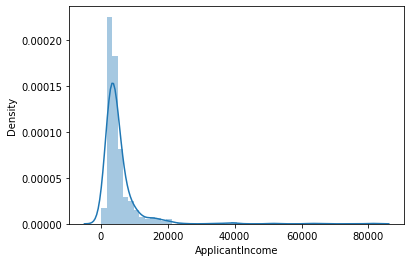

In [67]:
sns.distplot(df.ApplicantIncome)

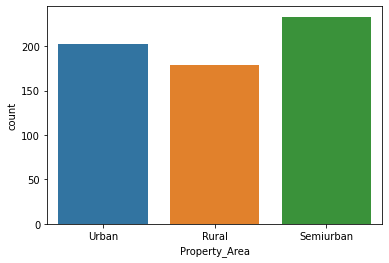

In [68]:
sns.countplot(df.Property_Area)

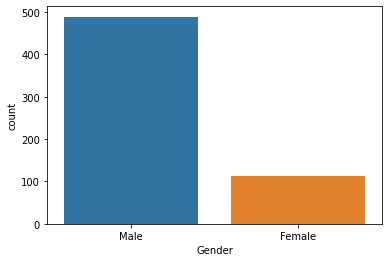

In [69]:
sns.countplot(df.Gender)

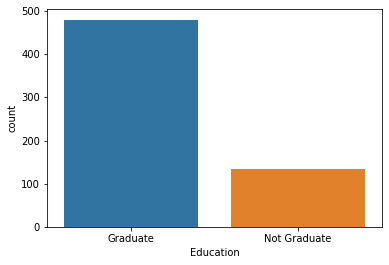

In [70]:
sns.countplot(df.Education)

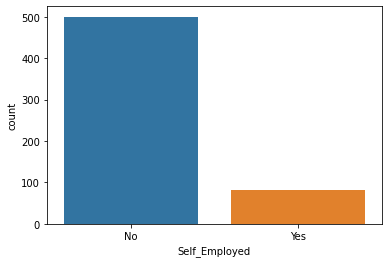

In [71]:
sns.countplot(df.Self_Employed)

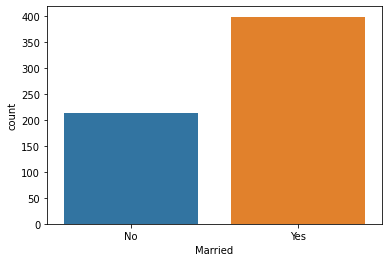

In [72]:
sns.countplot(df.Married)

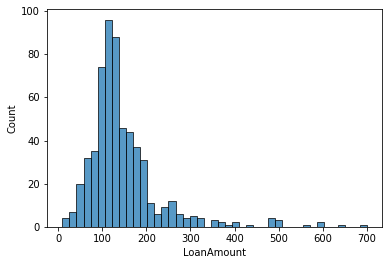

In [73]:
sns.histplot(df.LoanAmount)

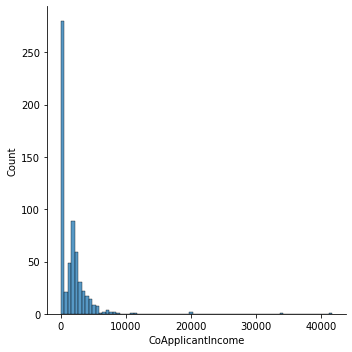

In [74]:
sns.displot(df.CoApplicantIncome)

([<matplotlib.patches.Wedge at 0x7f647564d810>,
 [Text(0.40661098511372595, 1.0220897743275028, 'Semi urban'),
  Text(-1.0582795633383781, -0.3000739339235115, 'Urban'),
  Text(0.67000963198199, -0.8724030565348555, 'Rural')])

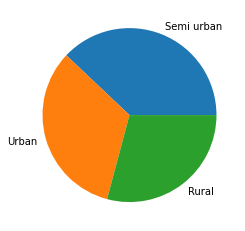

In [75]:
plt.pie(df.Property_Area.value_counts(),[0,0,0],labels=['Semi urban','Urban','Rural'])

In [76]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [77]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [78]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

([<matplotlib.patches.Wedge at 0x7f6475669410>,
 [Text(-0.8514262161117528, 0.6964721089301588, 'Graduate'),
  Text(0.8514262161117524, -0.6964721089301593, 'Not Graduate')])

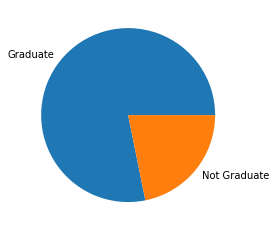

In [79]:
plt.pie(df.Education.value_counts(),[0,0],labels=['Graduate','Not Graduate'])

## Bivariate Analysis

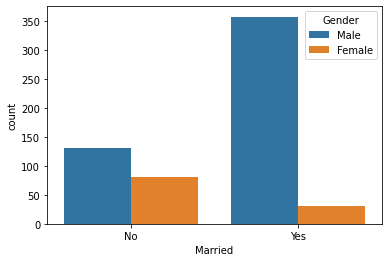

In [80]:
sns.countplot(df['Married'],hue=df['Gender'])

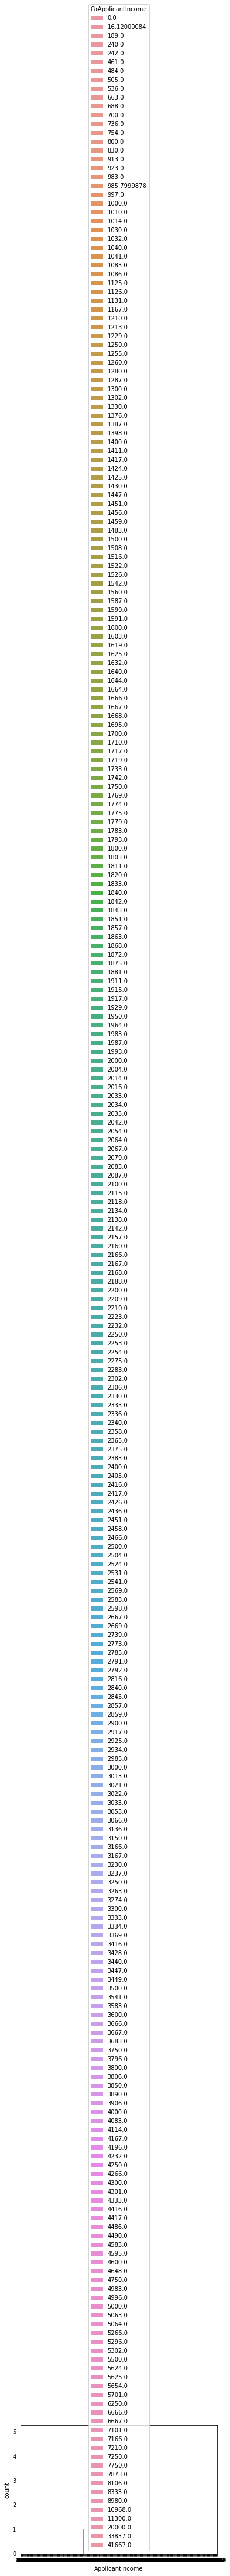

In [81]:
sns.countplot(df['ApplicantIncome'],hue=df['CoApplicantIncome'])

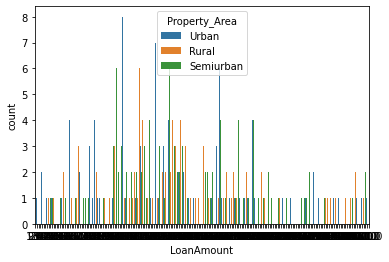

In [82]:
sns.countplot(df['LoanAmount'],hue=df['Property_Area'])

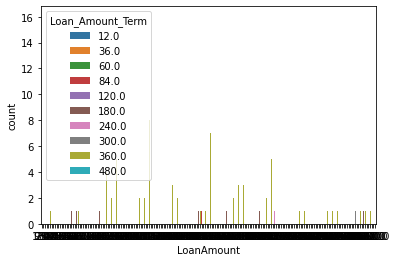

In [83]:
sns.countplot(df['LoanAmount'],hue=df['Loan_Amount_Term'])

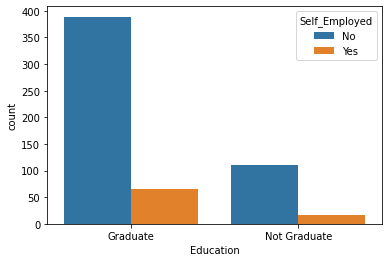

In [84]:
sns.countplot(df['Education'],hue=df['Self_Employed'])

In [85]:
sns.barplot(df.ApplicantIncome,df.CoapplicantIncome)

AttributeError: ignored

In [ ]:
plt.scatter(df.ApplicantIncome,df.LoanAmount)

In [ ]:
sns.countplot(df['Dependents'],hue=df['Gender'])

## Multivariate Analysis

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
plt.plot(df.LoanAmount,df.ApplicantIncome,df.CoapplicantIncome)

In [ ]:
df.plot.line()

In [ ]:
df.hist()

In [ ]:
plt.plot(df.Loan_Amount_Term,df.ApplicantIncome,df.CoapplicantIncome)

## Descriptive Analysis

In [ ]:
df.describe()

In [ ]:
df.mean()

In [ ]:
df.mode()

In [ ]:
df.std()

In [ ]:
df.count()

## Checking For Null Values

In [ ]:
df.isnull().any()

In [ ]:
df.isnull().sum()

In [ ]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [ ]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df.isnull().any()

In [ ]:
df.isnull().sum()

## Handling Categorical Values

In [ ]:
df.head()

In [ ]:
le=LabelEncoder()

In [ ]:
df.Gender=le.fit_transform(df.Gender)
df.Married=le.fit_transform(df.Married)
df.Education=le.fit_transform(df.Education)
df.Self_Employed=le.fit_transform(df.Self_Employed)
df.Property_Area=le.fit_transform(df.Property_Area)
df.Loan_Status=le.fit_transform(df.Loan_Status)
df.Dependents=le.fit_transform(df.Dependents)

In [ ]:
df.head()

## Spliting into dependent and independent data

In [ ]:
df.head()

In [ ]:
x=df.iloc[:,:-1]
y=df.Loan_Status

In [ ]:
x.head()

In [ ]:
y.head()

## Scaling The Data

In [ ]:
x_scale=pd.DataFrame(scale(x),columns=x.columns)
x_scale.head()

## Balancing The Dataset

In [ ]:
sns.countplot(df.Loan_Status)

In [ ]:
rus=RandomUnderSampler(sampling_strategy=1)
x_res,y_res=rus.fit_resample(x,y)
ax=y_res.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("under-sampling")

## Splitting Data Into Train And Test


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
xtrain.head()

In [ ]:
xtest.head()

In [ ]:
ytrain.head()

In [ ]:
ytest.head()

In [ ]:
xtrain.shape

In [ ]:
xtest.shape

In [ ]:
ytrain.shape

In [ ]:
ytest.shape

## Model Building

## Decision Tree Model

In [ ]:
dmodel=DecisionTreeClassifier(random_state=100)

In [ ]:
dmodel.fit(x_res,y_res)

In [ ]:
ypredd=dmodel.predict(xtest)

In [ ]:
ypred2d=dmodel.predict(xtrain)

In [ ]:
print("Decision Tree Model Testing Accuracy")
print(accuracy_score(ytest,ypredd))
print("Decision Tree Model Training Accuracy")
print(accuracy_score(ytrain,ypred2d))